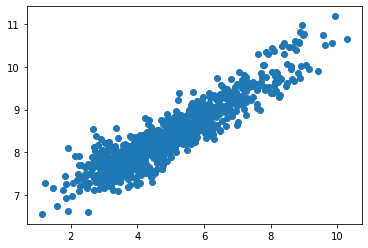

In [126]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)

mass = galaxy_properties['mass']
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, mass)

In [221]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(spectra, mass, random_state = 101)
model = Ridge(random_state=1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

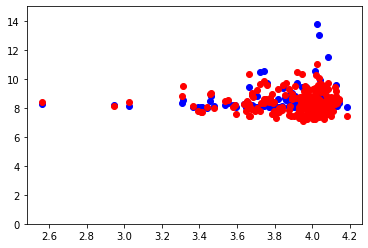

In [178]:
X = np.empty(len(X_test))
for i in range(len(X_test)):
    X[i] = np.log(np.sum(X_test[i]))

plt.ylim(0, 15)
plt.scatter(X, predict, c='blue')
plt.scatter(X, y_test, c='red')

In [179]:
print(mean_squared_error(y_test, predict))

0.26707615166906645


In [206]:
alphas = np.arange(0.4, 0.6, 0.01)

model = RidgeCV(alphas=alphas, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)

print("Best alpha: ", model.alpha_)

Best alpha:  0.5300000000000001


In [207]:
model.coef_.shape

(850,)

In [208]:
prediction = model.predict(spectra)

In [209]:
mean_squared_error(mass, prediction)

0.20139649262171855

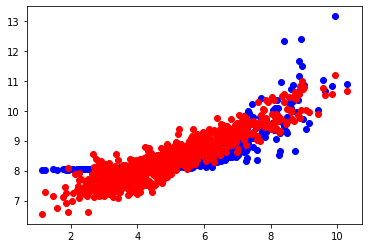

In [210]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, prediction, c='blue')
plt.scatter(X, mass, c='red')

In [211]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(spectra, mass, random_state = 101)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [214]:
prediction = model.predict(X_test)
mean_squared_error(prediction, y_test)

0.025698195527615545

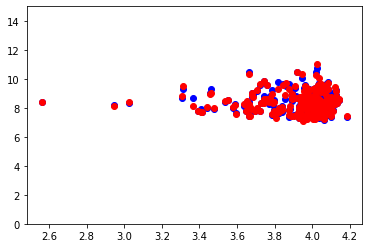

In [217]:
X = np.empty(len(X_test))
for i in range(len(X_test)):
    X[i] = np.log(np.sum(X_test[i]))

plt.ylim(0, 15)
plt.scatter(X, prediction, c='blue')
plt.scatter(X, y_test, c='red')

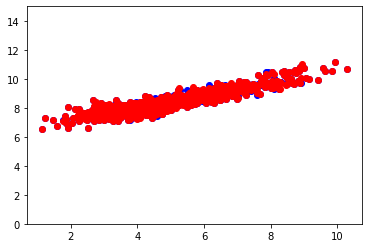

In [219]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

plt.ylim(0, 15)
plt.scatter(X, model.predict(spectra), c='blue')
plt.scatter(X, mass, c='red')

In [226]:
params = {
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', 212, 425, 638]
}

dtr = DecisionTreeRegressor(random_state=101)
model = GridSearchCV(dtr, params, scoring = 'neg_mean_squared_error', verbose = 2, n_jobs = 4, return_train_score=True, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)
bm = model.best_estimator_
print(model.best_score_)
print(model.best_params_)

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    3.8s finished


-0.02489117013801586
{'max_depth': None, 'max_features': 638}


In [231]:
params = {
    'max_features': np.arange(800, 850, 1)
}

dtr = DecisionTreeRegressor(random_state=101)
model = GridSearchCV(dtr, params, scoring = 'neg_mean_squared_error', verbose = 2, n_jobs = 4, return_train_score=True, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)
bm = model.best_estimator_
print(model.best_score_)
print(model.best_params_)

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   27.1s finished


-0.023033749400405357
{'max_features': 803}


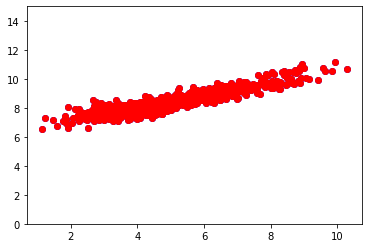

In [232]:
plt.ylim(0, 15)
plt.scatter(X, bm.predict(spectra), c='blue')
plt.scatter(X, mass, c='red')

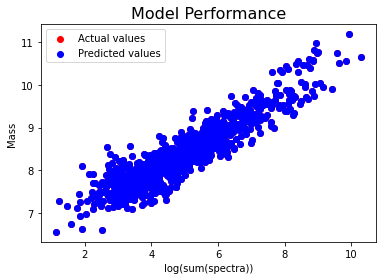

In [238]:
fig, ax = plt.subplots()
ax.scatter(X, mass, color='red', label='Actual values')
plt.scatter(X, bm.predict(spectra), color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
ax.set_ylabel("Mass")
ax.set_xlabel("log(sum(spectra))")
fig.savefig("model_performance mass", dpi=300)